In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as sts
import warnings

from scipy.stats.mstats import winsorize
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from sqlalchemy import create_engine
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale

from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

In [7]:
ogr = pd.read_excel("C:\\Users\\Gunesim\\Desktop\\Ödevler\\states_full.xls", encoding="utf8")

1NCİ SORU:

In [10]:
ogr["WEIGHTED_MEAN_SCORE"]=(ogr["GRADES_4_G"]*ogr["AVG_MATH_4_SCORE"]+
                            ogr["GRADES_4_G"]*ogr["AVG_READING_4_SCORE"]+
                            ogr["GRADES_8_G"]*ogr["AVG_MATH_8_SCORE"]+
                            ogr["GRADES_8_G"]*ogr["AVG_READING_8_SCORE"])/(
                            2*(ogr["GRADES_4_G"]+ogr["GRADES_8_G"]))

2NCİ SORU:

Text(0.5, 1.0, 'Harcama Kalemleri Korelasyon Matrisi')

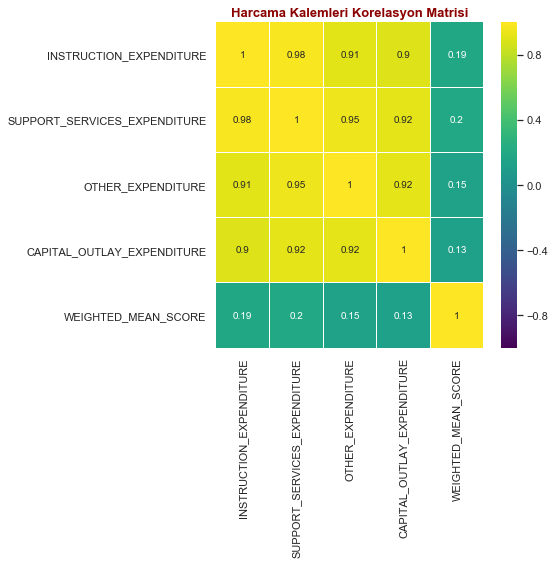

In [37]:
ogr_harcama=ogr.iloc[:,9:13]
ogr_harcama["WEIGHTED_MEAN_SCORE"]=ogr["WEIGHTED_MEAN_SCORE"]

ogr_harcama_kor=ogr_harcama.corr()

plt.figure(figsize=(6,6))
sns.heatmap(ogr_harcama_kor, vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)
plt.title("Harcama Kalemleri Korelasyon Matrisi", fontdict=baslik_font)

Destek hizmetleri harcamaları (0.2), genel not ortalaması üzerinde en fazla etkiyi yapmaktadır. Eğitim harcamaları (0.19) da, destek hizmetleri harcamalarına en yakın etkiyi yapan diğer bir harcama türüdür.

3NCÜ SORU:

In [78]:
sklearn_pca = PCA(n_components=4)
Y_sklearn=sklearn_pca.fit_transform(X)

sklearn_pca.explained_variance_ratio_

array([0.9458089 , 0.03070937, 0.01987426, 0.00360747])

Toplam varyansın % 94.5'i ilk bileşen tarafından açıklanmaktadır.

4NCÜ SORU:

In [79]:
korelasyon=pd.DataFrame()
korelasyon["Ağırlıklı Ortalama"]=ogr["WEIGHTED_MEAN_SCORE"]
korelasyon["PC1"]=pd.DataFrame(Y_sklearn)[0]
korelasyon.corr()

,Ağırlıklı Ortalama,PC1
Ağırlıklı Ortalama,1.000000,0.172551
PC1,0.172551,1.000000


Oluşturduğumuz genel not ortalaması ile ilk temel değişken arasındaki korelasyon 0.17'dir. 

5NCİ SORU:

Oluşturduğumuz temel değişkeni değil, harcama kalemlerini tercih ederdim. Sebebi ise;
>Oluşturduğumuz temel değişken %17'lik bir korelasyona sahipken, Eğitim Harcamaları ve Destek Hizmetleri Harcamalarının her biri bundan daha yüksek korelasyonlara sahiptir. Bu iki harcama kalemini birlikte aldığımızda harcama kalemleri ile sınav notları arasından daha fazla ilişki kurmuş oluruz.